# ENTREGABLE 3

# INSTRUCCIONES

Utilizar el archivo CSV (dataset_default.csv).

# ¿POR QUÉ Y CUANDO DEBO ESCALAR LOS DATOS?

En este notebook vamos a analizar el efecto que el escalamiento de los datos tiene en el desempeño de diferentes modelos de *Machine Learning*.

Y con los resultados que obtengamos tendremos claro cuando resulta conveniente escalar los datos y cuando no.

## 1. El problema a resolver

Usaremos un set de datos que contiene la información asociada al pago ("no default") e impago ("default") de un crédito bancario para un total de 5.383 personas.

Construiremos varios modelos de *Machine Learning* que tomarán como entrada datos como el puntaje crediticio, los ingresos mensuales y el monto del préstamo, y aprenda a predecir si el usuario pagará a tiempo ("no default", 0) o se retrasará en sus pagos ("default", 1).

Y cada modelo será entrenado con datos con y sin escalar y veremos el efecto que esto tiene en cada modelo.

In [1]:
!pip install nbformat>=4.2.0

In [2]:
!pip install plotly

In [3]:
# Importar las librerías
import pandas as pd
import plotly.express as px
import nbformat

# from google.colab import drive

# # Montar Google Drive
# drive.mount('/gdrive')

## 2. El set de datos

In [4]:
# Leer el dataset
RUTA = 'C:\\Users\\josan\\Documents\\GitHub\\EDEM_MDA2324\\Alumnos\\ES\\Josan_Rodrigo_Cortes\\Machine_learning\\EntregablesHechos\\dataset_default.csv'
df = pd.read_csv(RUTA)
df

,Puntaje crediticio,Ingresos mensuales (USD),Monto del préstamo (USD),¿Default/No default?
0,5.3,6074.6,34159.9,0
1,4.1,4955.0,35168.6,0
2,4.4,4573.6,26852.8,0
3,3.1,6019.0,31500.9,0
4,5.0,1481.1,38094.6,1
...,...,...,...,...
5378,2.9,2558.5,47140.9,1
5379,0.7,3594.2,46654.5,1
5380,6.4,681.2,44423.2,1
5381,2.5,5172.0,24832.9,0


Veamos un conteo de categorías para verificar si el set de datos está balanceado:

In [5]:
df['¿Default/No default?'].value_counts(normalize=True)

1    0.507152
0    0.492848
Name: ¿Default/No default?, dtype: float64

Veamos los rangos de valores que alcanzan los datos que usaremos como entrada de cada modelo:

In [6]:
for col in df.columns[0:3]:
    # Calcular valores mínimo y máximo de la columna
    minimo = df[col].min()
    maximo = df[col].max()
    print(f'Máximo/mínimo columna "{col}": {maximo:.1f}/{minimo:.1f}')

Máximo/mínimo columna "Puntaje crediticio": 7.5/0.0
Máximo/mínimo columna "Ingresos mensuales (USD)": 6997.8/1.4
Máximo/mínimo columna "Monto del préstamo (USD)": 49991.1/20023.4


Y vemos que **cada columna tiene una escala diferente**.

Y por último hagamos un gráfico 3D de los datos para entender sus principales características:

In [9]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"


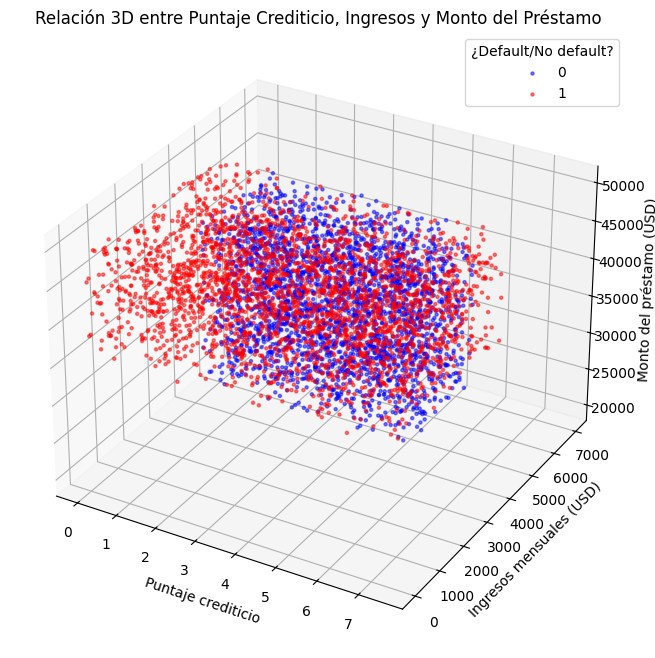

In [21]:
# import nbformat
# fig = px.scatter_3d(df, x='Puntaje crediticio', y='Ingresos mensuales (USD)',
#                     z='Monto del préstamo (USD)', color='¿Default/No default?',
#                     size_max=6, opacity = 0.5)
# fig.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Asignar colores basados en la condición de default
colors = {0: 'blue', 1: 'red'}
grouped = df.groupby('¿Default/No default?')

# Plotear cada grupo para diferenciar por colores
for key, group in grouped:
    ax.scatter(group['Puntaje crediticio'], group['Ingresos mensuales (USD)'],
               group['Monto del préstamo (USD)'], s=5, c=colors[key], label=key, alpha=0.5)

# Etiquetas de los ejes
ax.set_xlabel('Puntaje crediticio')
ax.set_ylabel('Ingresos mensuales (USD)')
ax.set_zlabel('Monto del préstamo (USD)')

# Título y leyenda
ax.set_title('Relación 3D entre Puntaje Crediticio, Ingresos y Monto del Préstamo')
ax.legend(title='¿Default/No default?')

# Mostrar el gráfico
plt.show()

##3. ¿Qué es el escalamiento de los datos?

> El escalamiento consiste en hacer que cada variable(columna) tenga aproximadamente **el mismo rango de valores**.

Por ejemplo, si antes del escalamiento tenemos:

- `Puntaje crediticio`: [0.0 - 7.5]
- `Ingresos mensuales`: [1.4 - 6997.8]
- `Monto del préstamo`: [20023.4 - 49991.1]

Después del escalamiento podríamos tener:

- Todas las variables entre 0 y 1 (normalización)
- Todas las variables con valores promedio de 0 y desviaciones estándar de 1 (estandarización)

## 4. Funciones requeridas

Para introducir los datos a cada modelo necesitaremos:

1. obtener las entradas (`X`) y salida (`Y`) del modelo a partir del set de datos original
2. crear los sets de entrenamiento, validación y prueba a partir de `X` y `Y`

Además, para entrenar y validar cada modelo con los datos escalados necesitaremos crear una función para ESCALAR los datos.


In [23]:
df.head(2)

,Puntaje crediticio,Ingresos mensuales (USD),Monto del préstamo (USD),¿Default/No default?
0,5.3,6074.6,34159.9,0
1,4.1,4955.0,35168.6,0


In [29]:
# Obtén los vectores X(características) e Y(target)
## A COMPLETAR
import numpy as np
df = df.to_numpy()
X, Y = (df[:, :-1], df[:, -1])



In [32]:
from sklearn.model_selection import train_test_split

## A COMPLETAR

'''Crear los sets de entrenamiento (70%), validación (15%)
    y prueba (15%)'''

X, x_test, Y, y_test = train_test_split(X,Y,test_size=0.15)

x_train, x_val, y_train, y_val= train_test_split(X,Y,test_size=0.15)

# Ejecutar la función


# Verificar
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(2808, 3) (2808,)
(496, 3) (496,)
(584, 3) (584,)


In [33]:
# Haremos escalamiento entre 0 y 1 (normalización)
from sklearn.preprocessing import MinMaxScaler

def escalar_datos(xtr, xvl, xts):
    '''Escalar datos de entrada (entrenamiento, validación y prueba)
    en el rango de 0 a 1'''
    scaler = MinMaxScaler()

    # Fit + transform sobre el set de entrenamiento
    xtr_s = scaler.fit_transform(xtr)

    # Transform sobre prueba y validación
    xvl_s = scaler.transform(xvl)
    xts_s = scaler.transform(xts)

    return xtr_s, xvl_s, xts_s

# Ejecutar la función
x_train_s, x_val_s, x_test_s = escalar_datos(x_train, x_val, x_test)

# Verificar
print(x_train_s.min(axis=0),x_train_s.max(axis=0))
print(x_val_s.min(axis=0),x_val_s.max(axis=0))
print(x_test_s.min(axis=0),x_test_s.max(axis=0))

[0. 0. 0.] [1. 1. 1.]
[0.         0.011014   0.00177558] [1.         0.99878417 0.9955377 ]
[ 0.         -0.0007152   0.00835722] [1.         1.         0.99904546]


Ya tenemos las funciones básicas requeridas. Ahora sí veamos el efecto que tiene el escalamiento en diferentes tipos de modelos.

##5. Efecto del escalamiento en diferentes modelos de *Machine Learning*

En este experimento probaremos con dos tipos de modelos:

1. Un árbol de clasificación, que es "inmune" al escalamiento
2. Un clasificador kNN (*k-nearest neighbors*) que es sensible al escalamiento
3. SVM

Veamos el efecto que el escalamiento tiene sobre estos dos tipos de modelos:

###5.1. Árboles de clasificación

> En los árboles de clasificación (y los árboles de regresión y los bosques aleatorios) **el desempeño es el mismo con o sin escalamiento de los datos**.

Lo anterior se debe a que al momento de clasificar (o predecir un dato numérico) internamente los árboles/bosques calculan umbrales que están dados en la escala en la que se encuentren los datos:

![](https://drive.google.com/uc?export=view&id=1FhtonygNk7DfSoVooMQQGjoQGYQlXqJh
)

Como el umbral se desplaza en la misma proporción que lo hace el escalamiento, todos estos modelos tendrán el mismo desempeño.

Verifiquemos esto con nuestro set de datos.

Creemos una función para entrenar y evaluar un sencillo árbol de clasificación:

In [ ]:
## A COMPLETAR
def entrenar modelo ()

Y ahora obtengamos el desempeño del árbol sin y con escalamiento:

In [ ]:
## A COMPLETAR

###5.2. Clasificador kNN (*k-nearest neighbors*)

> En los clasificadores kNN **el desempeño NO necesariamente será el mismo con o sin escalamiento de los datos**.

Este clasificador toma el dato a clasificar y calcula su distancia con respecto a la totalidad de los datos. Luego determina la categoría con base en las categorías de los *k* datos más cercanos (con la menor distancia).

La clave es la forma como se calculan las distancias entre el punto a clasificar y los demás puntos con categorías conocidas:

![](https://drive.google.com/uc?export=view&id=1FkAVal4XEBb6HcpE4IS6yL5N7OEsCuaJ
)

Si cada característica tiene una escala diferente entonces aquellas características con mayores escalas tendrán un mayor efecto en el valor de la distancia obtenida.

Veamos nuevamente este comportamiento para el set de datos que estamos usando.

Creemos una función para entrenar y evaluar un clasificador kNN:

In [ ]:
## A COMPLETAR

Y ahora calculemos el desempeño sin y con escalamiento:

In [ ]:
## A COMPLETAR

###5.3. Clasificador SVM (*Support Vector Machine*)

Comprobar ahora como afecta la normalización usando un modelo de SVM

##6. Conclusiones

In [ ]:
## A COMPLETAR